In [93]:
pip install pandas

In [94]:
pip install matplotlib

In [95]:
pip install seaborn

In [96]:
pip install sklearn

In [97]:
pip install mlxtend

Import the necessary libraries for data analysis and visualization, including Pandas, NumPy, Matplotlib, and Seaborn. The %matplotlib inline command is used to display the generated plots within the Jupyter Notebook itself.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read a CSV file named "loan_ml.csv" into a Pandas DataFrame called df. The head() function is then used to display the first few rows of the DataFrame to get an initial understanding of the data.

In [99]:
#to read the dataset
df=pd.read_csv("loan_ml.csv")
df.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

 Create a heatmap using Seaborn to visualize missing values (null or NaN) in the DataFrame. The df.isnull() function returns a DataFrame of the same shape as df with boolean values indicating missing values. The heatmap provides a visual representation of missing values in the dataset.

<Axes: >

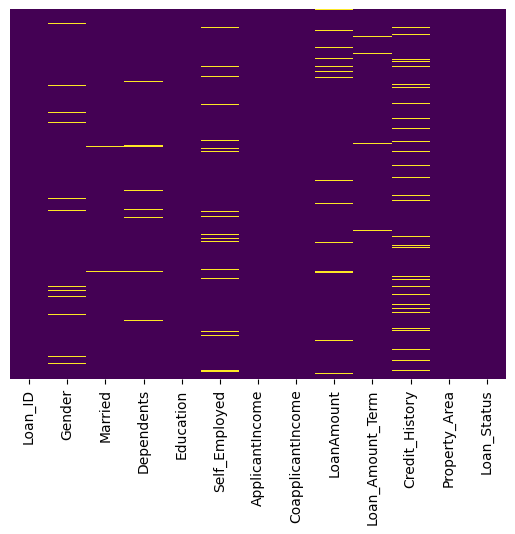

In [100]:
#Heat map showing values which are not available or null
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

perform one-hot encoding for the 'Gender' column in the DataFrame. The pd.get_dummies() function converts categorical variables into dummy/indicator variables. The resulting dummy variables are then concatenated with the original DataFrame using pd.concat(). The original 'Gender' column and 'Loan_ID' column are dropped from the DataFrame using df.drop().

In [101]:
sex = pd.get_dummies(df['Gender'],drop_first=True)


In [102]:
df.drop(['Gender','Loan_ID'],axis=1,inplace=True)
df = pd.concat([df,sex],axis=1)
df.head()

Married Dependents     Education Self_Employed  ApplicantIncome  \
0      No          0      Graduate            No             5849   
1     Yes          1      Graduate            No             4583   
2     Yes          0      Graduate           Yes             3000   
3     Yes          0  Not Graduate            No             2583   
4      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  Male  
0         Urban           Y     1  
1         Rural           N     1  
2         Urban           Y     1  
3         Urban           Y     1  
4         Urban           Y     1

Similar to the previous lines, below lines perform one-hot encoding for the 'Married' and 'Education' columns. The resulting dummy variables are concatenated with the DataFrame, and the original 'Married' and 'Education' columns are dropped.

In [103]:
married = pd.get_dummies(df['Married'],drop_first=True)
education = pd.get_dummies(df['Education'],drop_first=True)
df.drop(['Married','Education'],axis=1,inplace=True)
df = pd.concat([df,married,education],axis=1)
df.head()

Dependents Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0            No             5849                0.0         NaN   
1          1            No             4583             1508.0       128.0   
2          0           Yes             3000                0.0        66.0   
3          0            No             2583             2358.0       120.0   
4          0            No             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  Male  Yes  \
0             360.0             1.0         Urban           Y     1    0   
1             360.0             1.0         Rural           N     1    1   
2             360.0             1.0         Urban           Y     1    1   
3             360.0             1.0         Urban           Y     1    1   
4             360.0             1.0         Urban           Y     1    0   

   Not Graduate  
0             0  
1             0  
2             0  
3             1  
4             0

Here, the column names 'Yes' and 'Male' are renamed to 'Married' and 'Gender', respectively. This step is done for better clarity and consistency in column names.

In [104]:
df=df.rename(columns={'Yes':'Married','Male':'Gender'})
df.head()

Dependents Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0            No             5849                0.0         NaN   
1          1            No             4583             1508.0       128.0   
2          0           Yes             3000                0.0        66.0   
3          0            No             2583             2358.0       120.0   
4          0            No             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  Gender  \
0             360.0             1.0         Urban           Y       1   
1             360.0             1.0         Rural           N       1   
2             360.0             1.0         Urban           Y       1   
3             360.0             1.0         Urban           Y       1   
4             360.0             1.0         Urban           Y       1   

   Married  Not Graduate  
0        0             0  
1        1             0  
2        1             0  
3        1             1  
4        0             0

In [105]:
df=df.rename(columns={'Sf':'Self_Employed'})
df.head()

Dependents Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0            No             5849                0.0         NaN   
1          1            No             4583             1508.0       128.0   
2          0           Yes             3000                0.0        66.0   
3          0            No             2583             2358.0       120.0   
4          0            No             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  Gender  \
0             360.0             1.0         Urban           Y       1   
1             360.0             1.0         Rural           N       1   
2             360.0             1.0         Urban           Y       1   
3             360.0             1.0         Urban           Y       1   
4             360.0             1.0         Urban           Y       1   

   Married  Not Graduate  
0        0             0  
1        1             0  
2        1             0  
3        1             1  
4        0             0

perform one-hot encoding for the 'Self_Employed' column and concatenate the resulting dummy variable with the DataFrame. The original 'Self_Employed' column is dropped.

In [106]:
self_emp = pd.get_dummies(df['Self_Employed'],drop_first=True)
df.drop(['Self_Employed'],axis=1,inplace=True)
df = pd.concat([df,self_emp],axis=1)
df.head()

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0             5849                0.0         NaN   
1          1             4583             1508.0       128.0   
2          0             3000                0.0        66.0   
3          0             2583             2358.0       120.0   
4          0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Property_Area Loan_Status  Gender  \
0             360.0             1.0         Urban           Y       1   
1             360.0             1.0         Rural           N       1   
2             360.0             1.0         Urban           Y       1   
3             360.0             1.0         Urban           Y       1   
4             360.0             1.0         Urban           Y       1   

   Married  Not Graduate  Yes  
0        0             0    0  
1        1             0    0  
2        1             0    1  
3        1             1    0  
4        0             0    0

Similar to previous renaming steps, the column name 'Yes' is renamed to 'Self_Employed' for clarity.

In [107]:
df=df.rename(columns={'Yes':'Self_Employed'})
df.head(50)

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0         NaN   
1           1             4583             1508.0       128.0   
2           0             3000                0.0        66.0   
3           0             2583             2358.0       120.0   
4           0             6000                0.0       141.0   
5           2             5417             4196.0       267.0   
6           0             2333             1516.0        95.0   
7          3+             3036             2504.0       158.0   
8           2             4006             1526.0       168.0   
9           1            12841            10968.0       349.0   
10          2             3200              700.0        70.0   
11          2             2500             1840.0       109.0   
12          2             3073             8106.0       200.0   
13          0             1853             2840.0       114.0   
14          2             1299             1086.0        17.0   
15          0             4950                0.0       125.0   
16          1             3596                0.0       100.0   
17          0             3510                0.0        76.0   
18          0             4887                0.0       133.0   
19          0             2600             3500.0       115.0   
20          0             7660                0.0       104.0   
21          1             5955             5625.0       315.0   
22          0             2600             1911.0       116.0   
23          2             3365             1917.0       112.0   
24          1             3717             2925.0       151.0   
25          0             9560                0.0       191.0   
26          0             2799             2253.0       122.0   
27          2             4226             1040.0       110.0   
28          0             1442                0.0        35.0   
29          2             3750             2083.0       120.0   
30          1             4166             3369.0       201.0   
31          0             3167                0.0        74.0   
32          1             4692                0.0       106.0   
33          0             3500             1667.0       114.0   
34         3+            12500             3000.0       320.0   
35          0             2275             2067.0         NaN   
36          0             1828             1330.0       100.0   
37          0             3667             1459.0       144.0   
38          0             4166             7210.0       184.0   
39          0             3748             1668.0       110.0   
40          0             3600                0.0        80.0   
41          0             1800             1213.0        47.0   
42          0             2400                0.0        75.0   
43          0             3941             2336.0       134.0   
44          0             4695                0.0        96.0   
45          0             3410                0.0        88.0   
46          1             5649                0.0        44.0   
47          0             5821                0.0       144.0   
48          0             2645             3440.0       120.0   
49          0             4000             2275.0       144.0   

    Loan_Amount_Term  Credit_History Property_Area Loan_Status  Gender  \
0              360.0             1.0         Urban           Y       1   
1              360.0             1.0         Rural           N       1   
2              360.0             1.0         Urban           Y       1   
3              360.0             1.0         Urban           Y       1   
4              360.0             1.0         Urban           Y       1   
5              360.0             1.0         Urban           Y       1   
6              360.0             1.0         Urban           Y       1   
7              360.0             0.0     Semiurban           N       1   
8              360.0 

Create a heatmap to visualize missing values in the DataFrame after the data preprocessing steps

<Axes: >

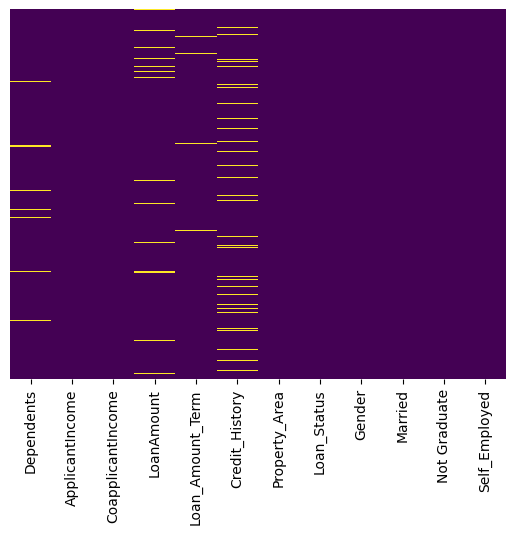

In [108]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Create a box plot using Seaborn to visualize the distribution of 'LoanAmount' based on the 'Self_Employed' column. The median values for each category are displayed on top of the box plots to provide additional information.

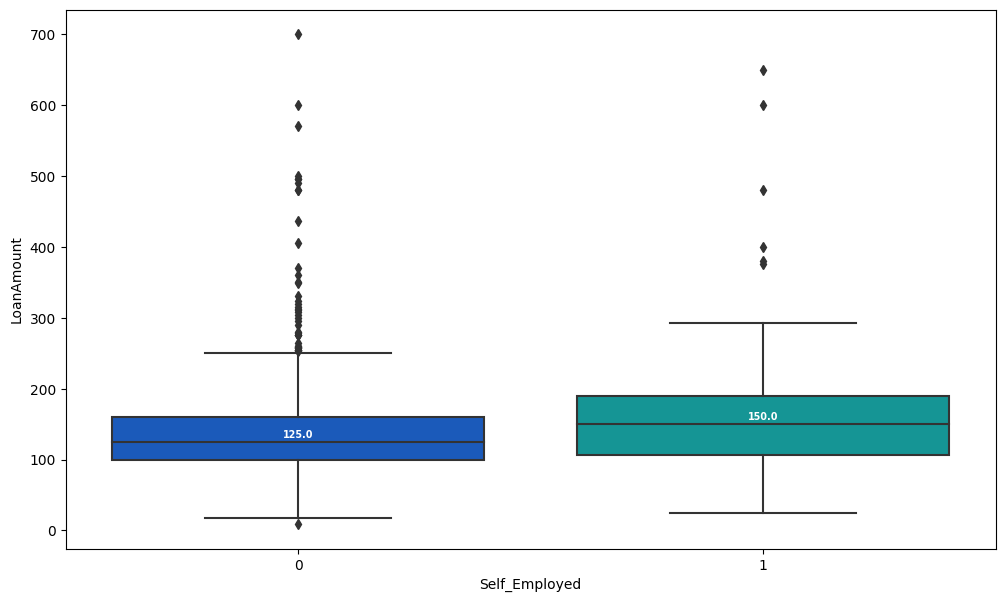

In [109]:
plt.figure(figsize=(12, 7))
bx=sns.boxplot(x='Self_Employed',y='LoanAmount',data=df,palette='winter')
medians=df.groupby(['Self_Employed'])['LoanAmount'].median()
vertical_offset=df['LoanAmount'].median() * 0.05
for xtick in bx.get_xticks():
    bx.text(xtick,medians[xtick]+vertical_offset,medians[xtick],horizontalalignment='center',size='x-small',color='w',weight='semibold')

Below code defines a function impute_LoanAmt() that takes a row of data as input. It checks if the 'LoanAmount' is missing (null) and the corresponding 'Self_Employed' value. If the 'Self_Employed' value is 1, it fills the missing 'LoanAmount' with 150; otherwise, it fills it with 125. The function is then applied to the 'LoanAmount' column using df[['LoanAmount', 'Self_Employed']].apply() to fill in the missing values.

In [110]:
def impute_LoanAmt(cols):
    Loan = cols[0]
    selfemp = cols[1]

    if pd.isnull(Loan):

        if selfemp == 1:
            return 150
        else:
            return 125

    else:
        return Loan
df['LoanAmount'] = df[['LoanAmount','Self_Employed']].apply(impute_LoanAmt,axis=1)

<Axes: >

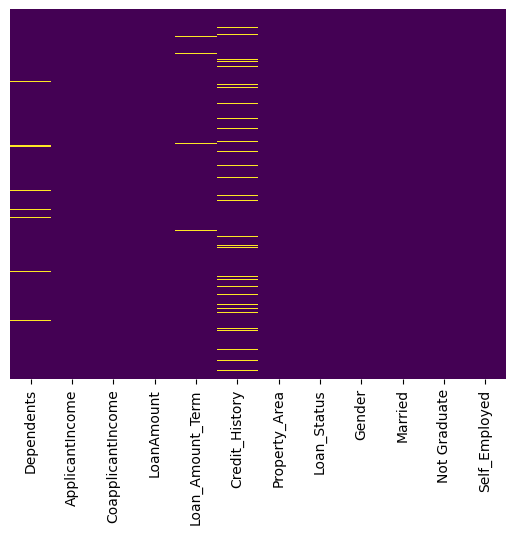

In [111]:

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Create a count plot using Seaborn to visualize the distribution of values in the 'Credit_History' column. The missing values in the 'Credit_History' column are then filled with 1.0, indicating a positive credit history. Another heatmap is created to visualize any remaining missing values.

<Axes: xlabel='Credit_History', ylabel='count'>

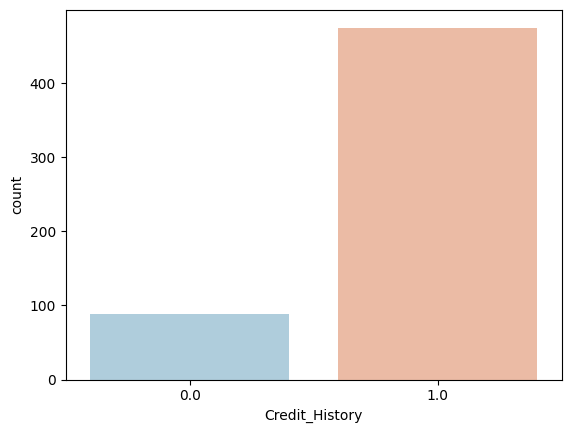

In [112]:
sns.countplot(x='Credit_History',data=df,palette='RdBu_r')

<Axes: >

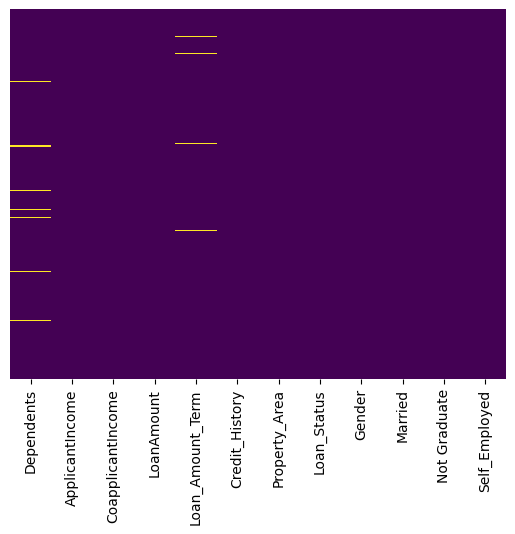

In [113]:
df['Credit_History'].fillna(1.0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Create a count plot for the 'Loan_Amount_Term' column and fill the missing values with the most common value, 360.0 (indicating a 360-month loan term). Another heatmap is created to visualize any remaining missing values.

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

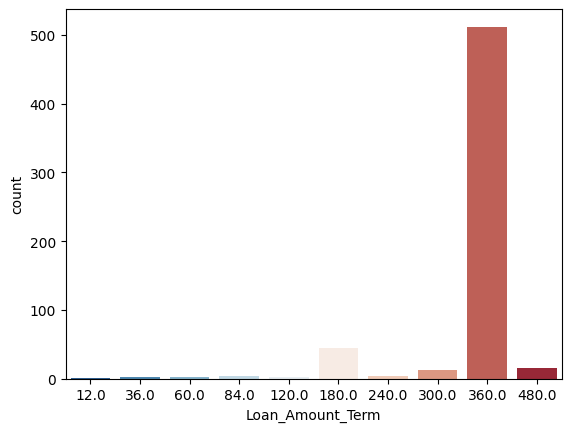

In [114]:
sns.countplot(x='Loan_Amount_Term',data=df,palette='RdBu_r')

<Axes: >

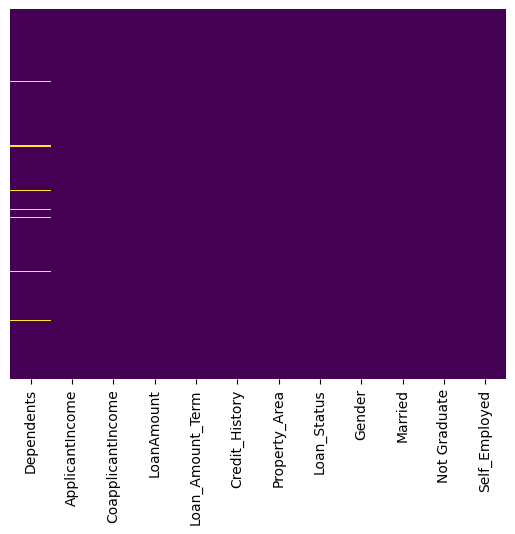

In [115]:
df['Loan_Amount_Term'].fillna(360.0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Create a count plot for the 'Dependents' column and fill the missing values with 0, indicating no dependents. Another heatmap is created to visualize any remaining missing values.

In [116]:
sns.countplot(x='Dependents',data=df,palette='RdBu_r')

<Axes: xlabel='Dependents', ylabel='count'>

In [117]:
df['Dependents'].fillna(0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

Perform one-hot encoding for the target variable 'Loan_Status' and concatenate the resulting dummy variable with the DataFrame. The original 'Loan_Status' column is dropped.

In [118]:
loanStatus = pd.get_dummies(df['Loan_Status'],drop_first=True)
df.drop(['Loan_Status'],axis=1,inplace=True)
df = pd.concat([df,loanStatus],axis=1)
df.head()

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0             5849                0.0       125.0   
1          1             4583             1508.0       128.0   
2          0             3000                0.0        66.0   
3          0             2583             2358.0       120.0   
4          0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History Property_Area  Gender  Married  \
0             360.0             1.0         Urban       1        0   
1             360.0             1.0         Rural       1        1   
2             360.0             1.0         Urban       1        1   
3             360.0             1.0         Urban       1        1   
4             360.0             1.0         Urban       1        0   

   Not Graduate  Self_Employed  Y  
0             0              0  1  
1             0              0  0  
2             0              1  1  
3             1              0  1  
4             0              0  1

Perform one-hot encoding for the 'Property_Area' column and concatenate the resulting dummy variable with the DataFrame. The original 'Property_Area' column is dropped.

In [119]:
PropArea = pd.get_dummies(df['Property_Area'],drop_first=True)
df.drop(['Property_Area'],axis=1,inplace=True)
df = pd.concat([df,PropArea],axis=1)
df.head()

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0          0             5849                0.0       125.0   
1          1             4583             1508.0       128.0   
2          0             3000                0.0        66.0   
3          0             2583             2358.0       120.0   
4          0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History  Gender  Married  Not Graduate  \
0             360.0             1.0       1        0             0   
1             360.0             1.0       1        1             0   
2             360.0             1.0       1        1             0   
3             360.0             1.0       1        1             1   
4             360.0             1.0       1        0             0   

   Self_Employed  Y  Semiurban  Urban  
0              0  1          0      1  
1              0  0          0      0  
2              1  1          0      1  
3              0  1          0      1  
4              0  1          0      1

StandardScaler from scikit-learn is used to standardize the features in the DataFrame. The 'Loan_Status' column is dropped from the DataFrame, and the remaining features are scaled using the fit_transform method of the StandardScaler. The scaled features are then stored in the DataFrame 'df_feat'.

In [120]:
df=df.rename(columns={'Y':'Loan_Status'})

In [121]:
df=df.replace(to_replace='3+',value=3)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train=pd.DataFrame(df.drop('Loan_Status',axis=1))
scaler.fit(train)
scaled_features = scaler.transform(train)
df_feat = pd.DataFrame(scaled_features,columns=train.columns)
df_feat.head()

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0   -0.737806         0.072991          -0.554487   -0.247076   
1    0.253470        -0.134412          -0.038732   -0.211384   
2   -0.737806        -0.393747          -0.554487   -0.949028   
3   -0.737806        -0.462062           0.251980   -0.306564   
4   -0.737806         0.097728          -0.554487   -0.056717   

   Loan_Amount_Term  Credit_History    Gender   Married  Not Graduate  \
0          0.273231        0.411733  0.505592 -1.357421     -0.528362   
1          0.273231        0.411733  0.505592  0.736691     -0.528362   
2          0.273231        0.411733  0.505592  0.736691     -0.528362   
3          0.273231        0.411733  0.505592  0.736691      1.892641   
4          0.273231        0.411733  0.505592 -1.357421     -0.528362   

   Self_Employed  Semiurban     Urban  
0      -0.392601  -0.782016  1.428147  
1      -0.392601  -0.782016 -0.700208  
2       2.547117  -0.782016  1.428147  
3      -0.392601  -0.782016  1.428147  
4      -0.392601  -0.782016  1.428147

Split the data into training and testing sets using the train_test_split function from scikit-learn. The features (scaled_features) and target variable (df['Loan_Status']) are split into training and testing sets, with 70% of the data used for training and 30% for testing.

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Loan_Status'],
                                                    test_size=0.30)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

Create a K-nearest neighbors (KNN) classifier with 3 neighbors and fits the classifier to the training data.

In [125]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Use the trained KNN classifier to make predictions on the testing data. The confusion matrix and classification report are then printed to evaluate the performance of the classifier.

In [126]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 27  31]
 [ 12 115]]
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        58
           1       0.79      0.91      0.84       127

    accuracy                           0.77       185
   macro avg       0.74      0.69      0.70       185
weighted avg       0.76      0.77      0.75       185



In [127]:
knn.predict([X_test[0]])
X_test[0]

array([-0.73780632, -0.36655234,  0.15142775, -0.49692366,  0.2732313 ,
       -2.42876026,  0.50559245,  0.73669096, -0.52836225, -0.39260074,
       -0.7820157 ,  1.42814704])

In [128]:
features=np.array([1,0,3,1,4000,3000,0,1,360,1.0])
features = scaler.fit_transform(features.reshape(-1, 1))
features=features.flatten()
features


array([-0.52413336, -0.52484579, -0.52270851, -0.52413336,  2.32486667,
        1.61243855, -0.52484579, -0.52413336, -0.26837167, -0.52413336])

In [129]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

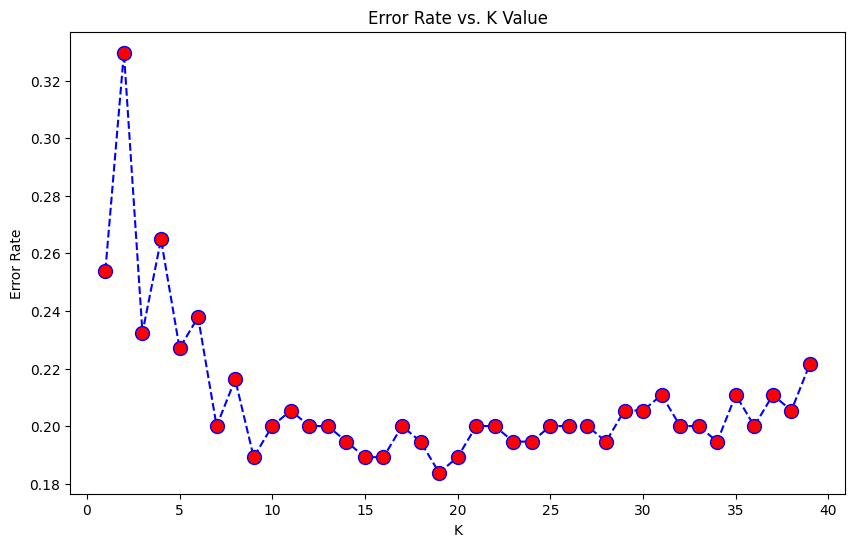

In [130]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [131]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [132]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 26  32]
 [  5 122]]
              precision    recall  f1-score   support

           0       0.84      0.45      0.58        58
           1       0.79      0.96      0.87       127

    accuracy                           0.80       185
   macro avg       0.82      0.70      0.73       185
weighted avg       0.81      0.80      0.78       185



In [133]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.8


In [134]:
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [135]:
df.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Not Graduate', 'Self_Employed', 'Loan_Status', 'Semiurban', 'Urban'],
      dtype='object')

In [136]:
x=df[['Married', 'Not Graduate', 'Dependents',
       'Self_Employed']]
y=df['LoanAmount']



In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(x.values,y.values,test_size=0.3,random_state=101)

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [140]:
print(lm.intercept_)

122.79183802683107


In [141]:
coeff=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff

Coefficient
Married          25.055180
Not Graduate    -39.267349
Dependents       16.390393
Self_Employed    25.934363

In [142]:
pred1=lm.predict(X_test)

In [143]:
from sklearn.metrics import max_error,explained_variance_score,mean_absolute_error
print(max_error(Y_test,pred1))
print(explained_variance_score(Y_test,pred1))
print(mean_absolute_error(Y_test,pred1))

501.2737994465065
-0.05300912023822457
54.23876733673551


In [144]:
dfx = pd.DataFrame({

   'Original': Y_test,

   'Predicted': pred1

   })


In [145]:
lm.predict([[1,0,3,1]])

array([222.95255822])

In [146]:
from sklearn import linear_model


In [147]:
bm=linear_model.BayesianRidge()
bm.fit(X_train,Y_train)


BayesianRidge()

In [148]:
pred2=bm.predict(X_test)

In [149]:
coeff2=pd.DataFrame(bm.coef_,x.columns,columns=['Coefficient'])
coeff2

Coefficient
Married          22.781886
Not Graduate    -34.806026
Dependents       16.361753
Self_Employed    21.828722

In [150]:
bm.predict([[1,0,3,1]])

array([217.57905585])

In [151]:
print(max_error(Y_test,pred2))
print(explained_variance_score(Y_test,pred2))
print(mean_absolute_error(Y_test,pred2))

504.2880889006218
-0.04627481090615748
53.639597801126044


In [152]:
!pip install xgboost



In [153]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [154]:
yhat = model.predict([[1,0,3,1]])
print('Predicted: %.3f' % yhat)

Predicted: 259.999


In [155]:
pred3=model.predict(X_test)

In [156]:
print(explained_variance_score(Y_test,pred3))
print(max_error(Y_test,pred3))

-0.1757555680288969
519.8459625244141


In [157]:
 from sklearn.ensemble import RandomForestRegressor
 regr = RandomForestRegressor(max_depth=2, random_state=0)
 regr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [158]:
regr.predict([[1,0,3,1]])

array([244.93813803])

In [159]:
pred4=regr.predict(X_test)

In [160]:
print(explained_variance_score(Y_test,pred4))
print(max_error(Y_test,pred4))

-0.11307422436935077
526.2315504967382
